<a href="https://colab.research.google.com/github/sadinenivenkatasaikumar/Ml_lab3/blob/main/MACHINE_LEARNING_LAB4_21177.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import math
data = {

    'age': ['<=30', '<=30', '31-40', '>40', '>40', '>40', '31-40', '<=30', '<=30', '>40', '<=30', '31-40', '31-40', '>40'],

    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],

    'is_student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],

    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],

    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']

}
df = pd.DataFrame(data)

def entropy(target):

    total = len(target)

    counts = target.value_counts()

    entropy = 0

    for count in counts:

        p = count / total

        entropy -= p * math.log2(p)

    return entropy

def information_gain(data, attribute, target):

    total_entropy = entropy(data[target])

    weighted_entropy = 0

    values = data[attribute].unique()

    for value in values:

        subset = data[data[attribute] == value]

        weight = len(subset) / len(data)

        weighted_entropy += weight * entropy(subset[target])

    return total_entropy - weighted_entropy


target_attribute = 'buys_computer'

information_gains = {}

for attribute in df.columns:

    if attribute != target_attribute:

        ig = information_gain(df, attribute, target_attribute)

        information_gains[attribute] = ig


best_attribute = max(information_gains, key=information_gains.get)



print("Information Gains:")

for attribute, ig in information_gains.items():

    print(f"{attribute}: {ig}")



print(f"The first feature for the decision tree is '{best_attribute}' with IG = {information_gains[best_attribute]}")


Information Gains:
age: 0.24674981977443933
income: 0.02922256565895487
is_student: 0.15183550136234159
credit_rating: 0.04812703040826949
The first feature for the decision tree is 'age' with IG = 0.24674981977443933


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd

categorical_cols = ['age', 'income', 'is_student', 'credit_rating']
df_encoded = pd.get_dummies(df, columns=categorical_cols)

X = df_encoded.drop(columns=['buys_computer'])
y = df_encoded['buys_computer']

model = DecisionTreeClassifier()

model.fit(X, y)

training_accuracy = model.score(X, y)
print("Training Set Accuracy:", training_accuracy)
tree_depth = model.get_depth()
print("Tree Depth:", tree_depth)


Training Set Accuracy: 1.0
Tree Depth: 4


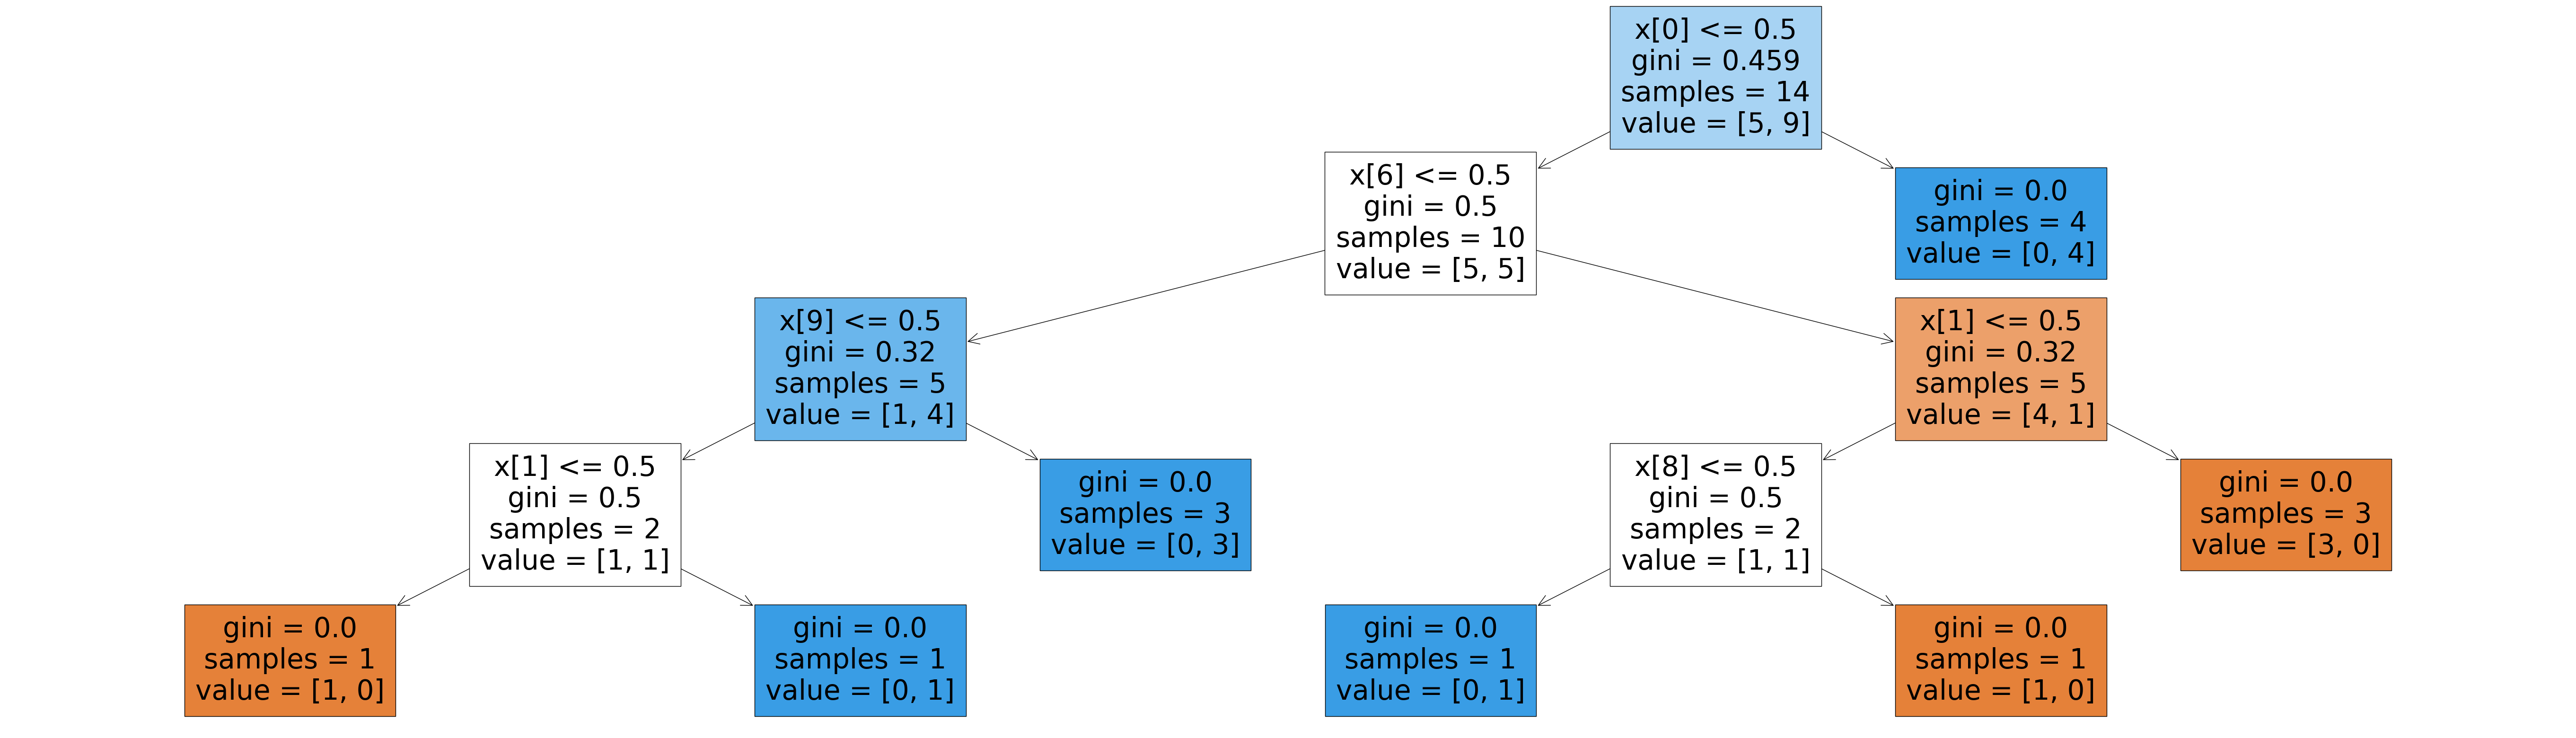

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(70, 20))
tree.plot_tree(model, filled=True)
plt.show()
